<a href="https://colab.research.google.com/github/TheKnight909/T5/blob/main/Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Task (2) Dataset.csv')
df

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246
...,...,...,...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [12]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [13]:
df.shape

(66639, 9)

### Identify and analyze patterns in the data.

In [25]:
print(pd.isnull(df).sum(),"\n")
print(df.dtypes,"\n")
print(df.nunique(),"\n")
print("duplicate:",df.duplicated().sum(),"\n")
for col in df.columns:
    print(f"\nValue counts for", df[col].value_counts())


City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64 

City                    object
Datetime                object
TrafficIndexLive         int64
JamsCount                int64
JamsDelay              float64
JamsLength             float64
TrafficIndexWeekAgo      int64
TravelTimeHistoric     float64
TravelTimeLive         float64
dtype: object 

City                      11
Datetime               22242
TrafficIndexLive         102
JamsCount                768
JamsDelay              12637
JamsLength              4137
TrafficIndexWeekAgo      102
TravelTimeHistoric     62772
TravelTimeLive         62772
dtype: int64 

duplicate: 0 


Value counts for City
Doha        8692
Riyadh      8692
Kuwait      8691
Cairo       8690
Dubai       8690
Abudhabi    3864
Al-ain      3864
Damma

City                           object
Datetime               datetime64[ns]
TrafficIndexLive                int64
JamsCount                       int64
JamsDelay                     float64
JamsLength                    float64
TrafficIndexWeekAgo             int64
TravelTimeHistoric            float64
TravelTimeLive                float64
Hour                            int32
dtype: object 

City                   0
Datetime               0
TrafficIndexLive       0
JamsCount              0
JamsDelay              0
JamsLength             0
TrafficIndexWeekAgo    0
TravelTimeHistoric     0
TravelTimeLive         0
Hour                   0
dtype: int64


<Axes: xlabel='Datetime'>

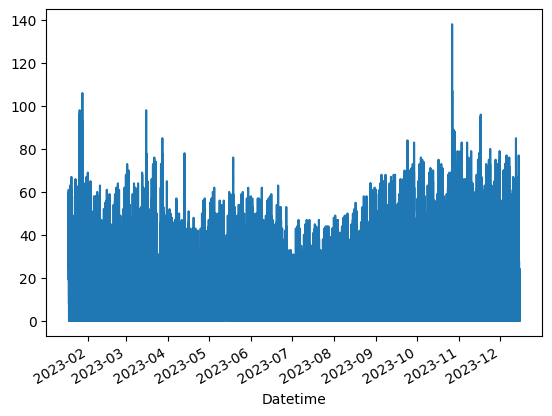

In [43]:
# Convert Datetime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])
print(df.dtypes,"\n")
df.dropna(inplace=True)
print(df.isnull().sum())
# Example: Traffic index trend over time
df.set_index('Datetime')['TrafficIndexLive'].plot()


### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

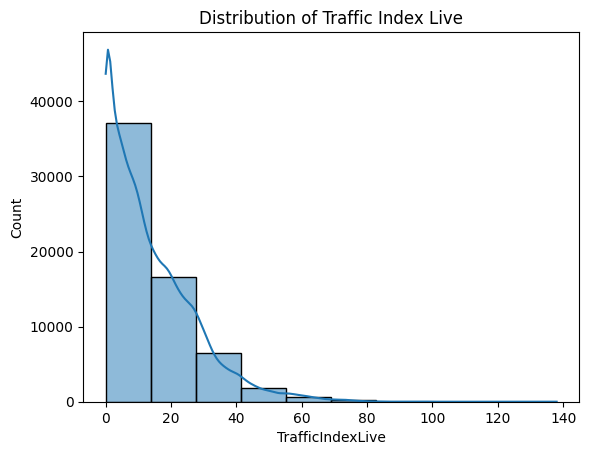

In [44]:
# Distribution of Traffic Index
sns.histplot(df['TrafficIndexLive'], bins=10, kde=True)
plt.title('Distribution of Traffic Index Live')
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


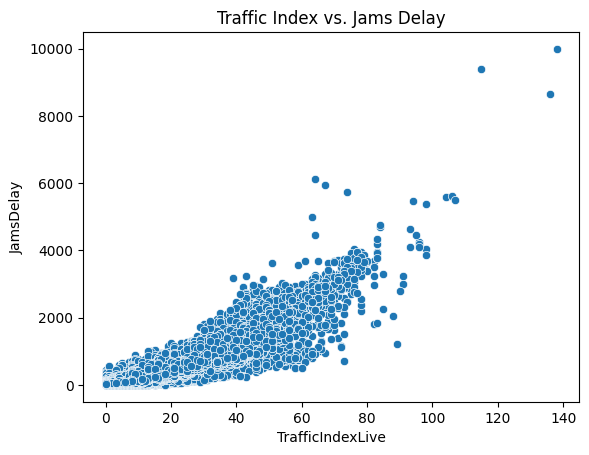

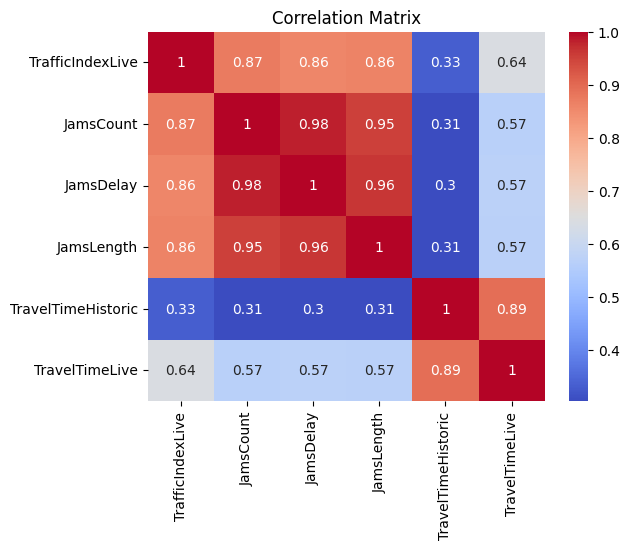

In [45]:
# Scatter plot of Traffic Index vs. Jams Delay
sns.scatterplot(x='TrafficIndexLive', y='JamsDelay', data=df)
plt.title('Traffic Index vs. Jams Delay')
plt.show()

# Correlation matrix
corr = df[['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 'TravelTimeHistoric', 'TravelTimeLive']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


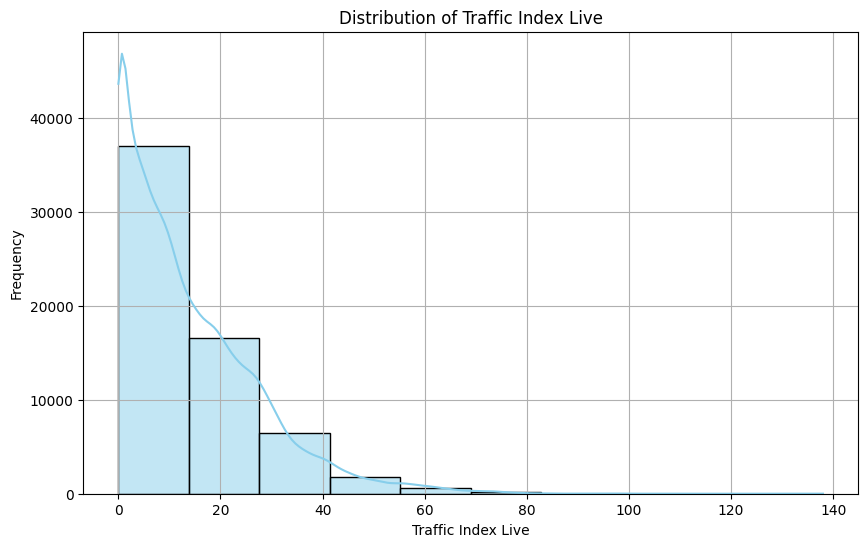

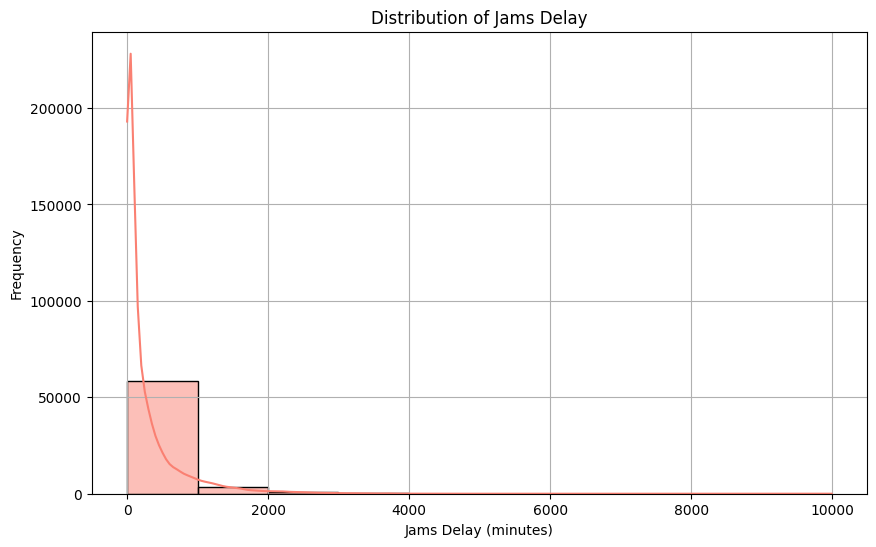

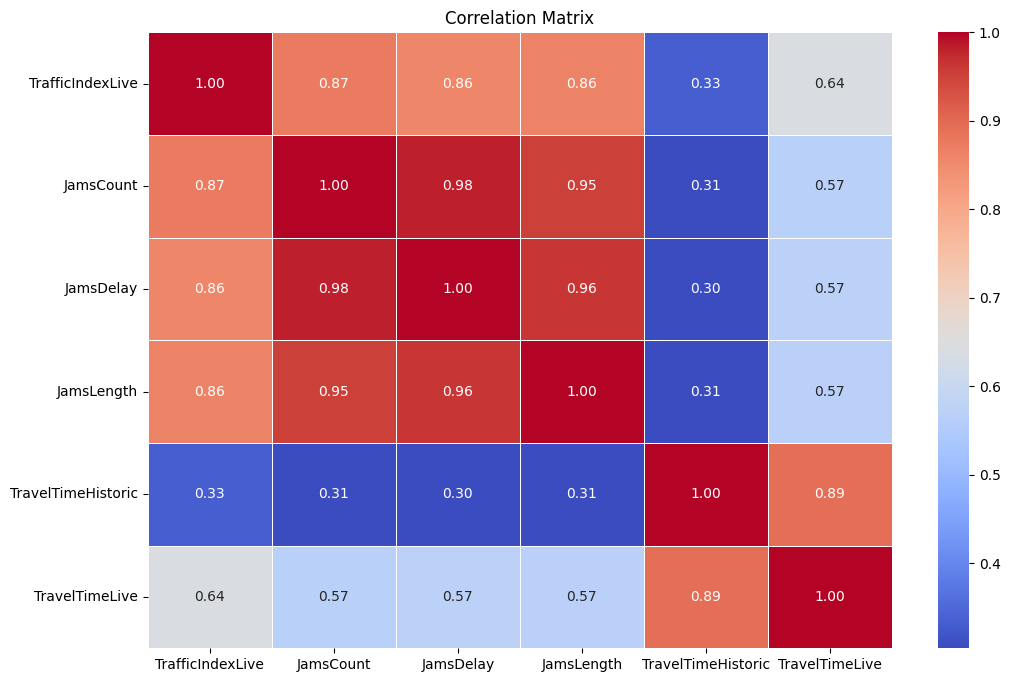

In [48]:
# Histogram for Traffic Index Live
plt.figure(figsize=(10, 6))
sns.histplot(df['TrafficIndexLive'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for Jams Delay
plt.figure(figsize=(10, 6))
sns.histplot(df['JamsDelay'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Jams Delay')
plt.xlabel('Jams Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
corr = df[['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 'TravelTimeHistoric', 'TravelTimeLive']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

<ipython-input-47-9cb99a755295>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='TrafficIndexLive', data=avg_traffic_index_by_hour, palette='viridis')


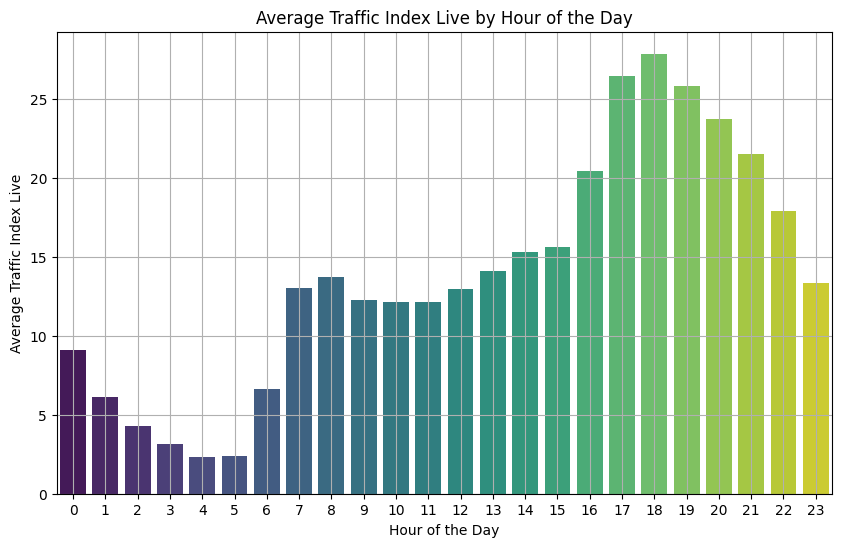

In [47]:
# Average Traffic Index Live by Hour of the Day
df['Hour'] = df['Datetime'].dt.hour
avg_traffic_index_by_hour = df.groupby('Hour')['TrafficIndexLive'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='TrafficIndexLive', data=avg_traffic_index_by_hour, palette='viridis')
plt.title('Average Traffic Index Live by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Index Live')
plt.grid(True)
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [ ]:
# Key Insights:
# 1. Traffic is heaviest in the late afternoon (from 4PM till 8PM).
# 2. Higher Traffic Index means more delays and longer jams.
# 3. Real-time travel times are usually worse than historical averages.
# 4. More traffic leads to more delays and longer jams.

# Conclusions:
# 1. Avoid traveling during late afternoon and evening to dodge heavy traffic.
# 2. Work on reducing traffic congestion to cut down on delays.
# 3. Real-time traffic may be worse than expected, so plan for extra time.